# Assignment 2 (extra-credit): The game of conversations

© Cristian Danescu-Niculescu-Mizil, 2023

<p style="text-align:center">
    <img src="https://drive.google.com/uc?export=view&id=19Xz_xj_ppHybHNVgDJlgbEY3TH_6gj2F" alt="A funny conversation between several characters in Game of Thrones." width="300"/><br/>(<a href="https://cheezburger.com/2930181/game-of-thrones-season-7-reimagined-as-text-messages">image source</a>)
</p>

- - -

## INFO/CS 4300: Language and Information <a class="anchor" id="guidelines"></a>

> <font color='red'><b>DUE</b>: February 15, 2023 (Wednesday), 11:59pm</font>

This assignment is an **individual** component.

By now, you've had some exposure to techniques for uncovering social dynamics in textual data through your assignments working with the "[*Keeping Up With The Kardashians*](https://en.wikipedia.org/wiki/Keeping_Up_with_the_Kardashians)" dataset. In this assignment we will be giving you the freedom to conduct analysis **of your choosing** on transcripts from the television series "[*Game of Thrones*](https://en.wikipedia.org/wiki/Game_of_Thrones)" (GoT).

<u>Contributors</u>: In addition to the course staff for INFO/CS 4300 from the past runs, Tushaar Gangavarapu and Jae Kim worked on updating this assignment, while Saif Mahmud and Kai Horstmann were involved in testing the assignment.

- - -

#### Extra-credit policy

The policy for this extra credit is that you should complete as much as you can.

- - -

#### Learning objectives

This project aims to help you get comfortable working with the following tools, technologies, and/or concepts:

* Applying learned tools to conduct novel analysis

- - -

#### Academic integrity and collaboration

As mentioned, this project should be completed **individually**. As a result, all University-standard academic integrity guidelines must be followed.

- - -

#### Grading

This extra-credit assignment is open-ended, and will ask you to do a free-form analysis. The number of extra points will be decided based on how interesting, creative, and unique your analysis is. This will, in part, be a subjective judgement on the part of the course staff.

- - -

**Submission**

* You are expected to submit this .ipynb as your submission for Assignment 2 (extra-credit). 
* In addition please submit an html copy of the notebook (you can create this by clicking File → Download as → HTML (.html)).

- - -
### Contents  <a class="anchor" id="contents"></a>

* [Instructions and guidelines](#guidelines)
* [Contents](#contents)
* [Imports](#0)
* [Free-form analysis: Data and preprocessing](#1)
* [Extra-credit task](#2)
  * [[1](#2a)] Option-1: Gender and social interactions
  * [[2](#2b)] Option-2: Open-ended analysis


- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Imports <a class="anchor" id="0"></a>

In [2]:
import re
import pickle

In [3]:
import sys
# Ensure that your kernel is using Python3
assert sys.version_info.major == 3

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Free-form analysis: Data and preprocessing <a class="anchor" id="1"></a>

We have provided you with some pre-cleansed data that contains a subset of the "Game of Thrones" transcripts. This is by no means a comprehensive dataset (many episodes are not represented), but it should be enough data for you to make some meaningful observations.

The data is represented as a dictionary that maps an episode title to a transcript (represented as a list of speaker-line tuples):
```json
{'A Golden Crown': [
      ('EDDARD', '  Your pardon, your Grace.'),
      ('CERSEI', ' Do you know what your wife has done?'),
      ...
  ],
  ...
}
```

**However, the data is messy so you might want to do some additional steps to clean it.** For instance, character names may not be consistent throughout the transcripts. There might be spelling errors in the names, and characters may be referenced by their firstname only, or by their full name.

In [4]:
with open("got_transcripts.pickle", "rb") as file:
    got_data = pickle.load(file)

In [34]:
# list(got_data.values())
GOT_corpus = []
for episode in list(got_data.values()):
    for speech in episode:
        GOT_corpus.append(speech)

In [69]:
# get the vocabulary
vocabulary = set()
for speech in GOT_corpus:
    vocabulary.update(tokenize(speech[1]))
vocabulary = list(vocabulary)
len(vocabulary)

5562

In [81]:
vocabulary_reverse_index = {word: index for index, word in enumerate(vocabulary)}
print(vocabulary_reverse_index)

{'marches': 0, 'punish': 1, 'disaster': 2, 'fell': 3, 'admiration': 4, 'accompagnent': 5, 'defense': 6, 'cross': 7, 'vile': 8, 'attracts': 9, 'commit': 10, 'ferm': 11, 'tart': 12, 'roles': 13, 'quoi': 14, 'hour': 15, 'rel': 16, 'embarrassment': 17, 'mhysa': 18, 'falling': 19, 'until': 20, 'chopped': 21, 'yeux': 22, 'caved': 23, 'new': 24, 'thorns': 25, 'immediately': 26, 'digne': 27, 'prepare': 28, 'cheated': 29, 'righteous': 30, 'supplies': 31, 'elected': 32, 'brings': 33, 'colored': 34, 'venir': 35, 'taking': 36, 'widow': 37, 'decides': 38, 'valaar': 39, 'neither': 40, 'grown': 41, 'saut': 42, 'dance': 43, 'mature': 44, 'ami': 45, 'avant': 46, 'stays': 47, 'begun': 48, 'brune': 49, 'mysterious': 50, 've': 51, 'opened': 52, 'forbidden': 53, 'normal': 54, 'likely': 55, 'racontait': 56, 'happened': 57, 'arrived': 58, 'nature': 59, 'swear': 60, 'feed': 61, 'grabs': 62, 'gonna': 63, 'stairs': 64, 'overfeed': 65, 'powerful': 66, 'proclaim': 67, 'bad': 68, 'practicing': 69, 'deepest': 70, '

- - -
<p style='text-align:right; font-size:11px'>[[contents](#contents)]</p>

### Extra-credit task <a class="anchor" id="2"></a>

For extra credit, we would like you to attempt the **ONE** of the following tasks:

#### <font color='blue'> Option 1: Gender and social interactions </font> <a class="anchor" id="2a"></a>

* Explore the role of gender in social interactions. For example, do people of one gender talk differently to those of the opposite gender? You should base this analysis on the age-based social interaction analysis in Assignment 2. You might also consider comparing GoT results with Kardashians results.
* Provide at least one plot illustrating your results.

Note: Being that there are many characters in GoT, you may have to select a subset of the characters to work with, and look up their genders. If you are looking only at a subset of the characters, please provide an explanation as for *how* and *why* you arrived at the subset that you did.

#### <font color='blue'> Option 2: Open-ended analysis </font> <a class="anchor" id="2b"></a>

> *you could've asked Jon Snow for hints on what is to be done, but <u>he knows nothing</u>!*

* Propose an interesting question that you would like to explore in regard to the GoT dataset.
* Answer your question by conducting and documenting your analysis on the dataset. To extract the conversational features and analyze social phenomena in conversations, you can explore our in-house conversational analysis toolkit, [ConvoKit](https://convokit.cornell.edu/)!
* Provide at least one plot illustrating your results.

Note: You will be rewarded points based on novelty of question, and on the thoughtfulness of the exploration.

In either options, make sure you clearly express the questions you are asking, and document the code. Try to use the level of detail we used in our problems from Assignment 2. Also, interpret the results (highlighting what you found particularly interesting/unexpected). You may choose to import additional libraries as you see fit so long as they are standard python libraries (https://docs.python.org/3/library/). 

We have provided you with the `tokenize()` helper functions to aid you in your analysis.

In [6]:
import numpy as np

In [7]:
def tokenize(text):
    """Returns a list of words that make up the text.    
    
    Parameters
    ----------
    text : str
        The input text string
    
    Returns
    -------
    list
        A list of tokens corresponding to the input string.
    """
    return [x for x in re.findall(r"[a-z]+", text.lower()) if x != ""]

In [10]:
got_data

68

In [42]:
# get each distinct characters in the corpus
characters = set()
for speech in GOT_corpus:
    characters.add(speech[0])
characters = sorted(list(characters))
print(len(characters))

296


In [46]:
# count the occurrences of each character in the corpus
characters_count = {}
for speech in GOT_corpus:
    if speech[0] in characters_count:
        characters_count[speech[0]] += 1
    else:
        characters_count[speech[0]] = 1

In [47]:
# reverse index of characters
characters_reverse_index = {t: i for i, t in enumerate(characters)}
# print(characters_reverse_index)

In [56]:
# get the top 10 characters
sorted_characters_by_occurrence = sorted(characters_count.items(), key=lambda x:x[1], reverse=True)
for i in range(10):
    print(sorted_characters_by_occurrence[i])

('TYRION', 365)
('JON', 276)
('EDDARD', 253)
('CERSEI', 252)
('DAENERYS', 207)
('JAIME', 179)
('ARYA', 174)
('LITTLEFINGER', 171)
('CATELYN', 170)
('SANSA', 168)


In [62]:
M_characters = [
    u'TYRION', u'JON', u'EDDARD', u'JAIME', u'LITTLEFINGER'
]
F_characters = [
    u'CERSEI', u'DAENERYS', u'ARYA', u'CATELYN', u'SANSA'
]
Good_characters = [
    u'TYRION', u'JON', u'EDDARD', u'JAIME', u'LITTLEFINGER',u'CERSEI', u'DAENERYS', u'ARYA', u'CATELYN', u'SANSA'
]
Good_characters_reverse_index = {t: i for i, t in enumerate(Good_characters)}

In [61]:
GOT_corpus[0][0]

'HIZDAHR'

In [66]:
# get the reply matrix of each character
# 
# reply_matrix[i][j] = the number of times character i replies to character j
# 

# initialize the reply matrix
reply_matrix = np.zeros((len(Good_characters), len(Good_characters)))

for speech_index in range(1, len(GOT_corpus)):
    previous_speech = GOT_corpus[speech_index - 1]
    speech = GOT_corpus[speech_index]
    if speech[0] in Good_characters and previous_speech[0] in Good_characters:
        reply_matrix[Good_characters_reverse_index[speech[0]], Good_characters_reverse_index[previous_speech[0]]] += 1

print(reply_matrix)

[[25. 20.  0. 14.  0. 18. 22.  0. 10.  1.]
 [20. 16.  4.  5.  0.  0.  1.  8.  2.  0.]
 [ 0.  4. 27.  9. 33. 12.  0. 30.  9.  8.]
 [16.  4.  7.  6.  2. 31.  1.  0.  9.  1.]
 [ 1.  1. 27.  1.  8. 19.  2.  0.  8. 18.]
 [21.  0. 19. 27. 21. 10.  0.  3.  5. 13.]
 [25.  0.  0.  0.  0.  0. 32.  0.  1.  0.]
 [ 0.  7. 28.  2.  1.  3.  0. 19.  1. 12.]
 [ 9.  2.  7. 10.  8.  5.  0.  0.  8.  4.]
 [ 1.  0.  8.  2. 15. 12.  2. 14.  4.  7.]]


In [75]:
gender_group_index = {'F': 0, 'M': 1}
gender_group_mat_index = {('F', 'F'): 0, ('F', 'M'): 1, ('M', 'F'): 2, ('M', 'M'): 3}

gender_group_reverse_index = {0: 'F', 1: 'M'}

In [84]:
# create gender_words_mat

gender_words_mat = np.zeros((4, len(vocabulary)))

for speech_index in range(1, len(GOT_corpus)):
    previous_speech = GOT_corpus[speech_index - 1]
    speech = GOT_corpus[speech_index]

    # previous_speech_tokens = tokenize(previous_speech[1])
    speech_tokens = tokenize(speech[1])

    if previous_speech[0] in Good_characters and speech[0] in Good_characters:
        gender_group = (gender_group_reverse_index[previous_speech[0] in F_characters], gender_group_reverse_index[speech[0] in F_characters])  
        for token in speech_tokens:
            gender_words_mat[gender_group_mat_index[gender_group]][vocabulary_reverse_index[token]] += 1
        
print(gender_words_mat)
print(gender_words_mat.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 1. 1.]]
(4, 5562)


In [92]:
'retard' in vocabulary

False

In [95]:
Good_characters_reverse_index

{'ARYA': 7,
 'CATELYN': 8,
 'CERSEI': 5,
 'DAENERYS': 6,
 'EDDARD': 2,
 'JAIME': 3,
 'JON': 1,
 'LITTLEFINGER': 4,
 'SANSA': 9,
 'TYRION': 0}

In [139]:
'piss' in vocabulary

True

In [144]:
insult_words = ['stupid', 'idiot', 'fool', 'dumb','vile','jackass','imbecile','fuck','fucker', 'shit', 'fucking' ,'cunt'
,'bastard','bitch', 'curse', 'whore', 'slut', 'piss','cock' ]
character_insult_matrix = np.zeros((len(Good_characters)))

for speech in GOT_corpus:
    character = speech[0]
    if character in Good_characters:
        tokens = tokenize(speech[1])
        for token in tokens:
            if(token in insult_words):
                character_insult_matrix[Good_characters_reverse_index.get(character)] += 1

for name in Good_characters:
    print(name,character_insult_matrix[Good_characters_reverse_index.get(name)])


TYRION 25.0
JON 8.0
EDDARD 1.0
JAIME 2.0
LITTLEFINGER 5.0
CERSEI 5.0
DAENERYS 2.0
ARYA 5.0
CATELYN 0.0
SANSA 6.0


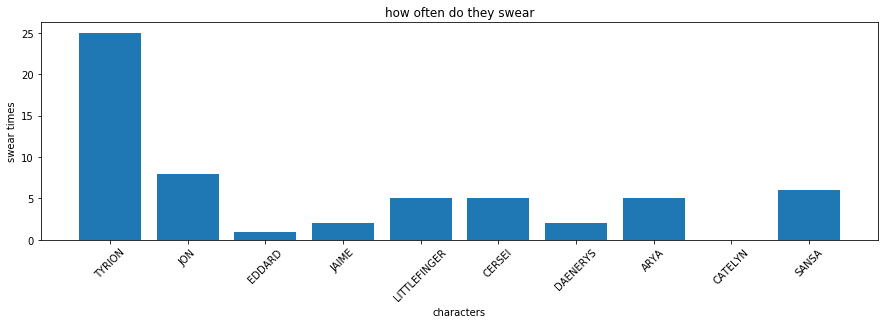

In [163]:
import matplotlib.pyplot as plt
plt.figure().set_figwidth(15)
plt.title("how often do they swear")
plt.xlabel('characters')
plt.ylabel('swear times')

plt.xticks(rotation=45)
plt.bar(Good_characters, character_insult_matrix, color='tab:blue')


plt.show()

- - -
<p style="text-align:left;"> assignment-2 [extra-credit] ends here <span style="float:right;font-size:11px;"> [[contents](#contents)] </span></p>
- - -